## Prediction Classification exercise, using pipelines

*  OBj: Predicting if my salary will be >50K USD in a foreign country


Dataset Description:
14 predictors and 1 target variable(TARGET: >50K, <=50K)
32561 records.

Variables independientes X:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# preparing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize


# models
from sklearn.linear_model import LogisticRegression


#metrics
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score

from IPython.core.display import display, HTML

# errors
import warnings
warnings.filterwarnings('ignore')

<hr>

### Get data

In [2]:
# Defining name variables for each column
nombres_columnas = ['aged', 'kind_job', 'fnlwgt', 'education',
                   'education_num', 'marital_st', 'profession',
                    'relations', 'race', 'sex', 'gains_capital',
                    'loss_capital', 'hours_week', 'country_born', 'target']
# reading data
XY = pd.read_csv('./Datos/adult.data.csv', sep=', ', names=nombres_columnas, index_col=False)
XY.head(3)

,aged,kind_job,fnlwgt,education,education_num,marital_st,profession,relations,race,sex,gains_capital,loss_capital,hours_week,country_born,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
XY.describe()

,aged,fnlwgt,education_num,gains_capital,loss_capital,hours_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aged           32561 non-null  int64 
 1   kind_job       32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital_st     32561 non-null  object
 6   profession     32561 non-null  object
 7   relations      32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  gains_capital  32561 non-null  int64 
 11  loss_capital   32561 non-null  int64 
 12  hours_week     32561 non-null  int64 
 13  country_born   32561 non-null  object
 14  target         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
print('Num_Rows:', format( XY.shape[0]))
print ('Num_columns:', format(XY.shape[1]))
print ('Name_columns:', format (XY.columns))


Num_Rows: 32561
Num_columns: 15
Name_columns: Index(['aged', 'kind_job', 'fnlwgt', 'education', 'education_num',
       'marital_st', 'profession', 'relations', 'race', 'sex', 'gains_capital',
       'loss_capital', 'hours_week', 'country_born', 'target'],
      dtype='object')


## NA_Values identification

In [6]:
XY.isna().sum()

aged             0
kind_job         0
fnlwgt           0
education        0
education_num    0
marital_st       0
profession       0
relations        0
race             0
sex              0
gains_capital    0
loss_capital     0
hours_week       0
country_born     0
target           0
dtype: int64

# Coding categorical data to integers for modeling

In [7]:
y=XY['target']
X=XY.drop('target', axis='columns')

* transform target in 0-1 depending of 50K value

In [8]:


dic={"<=50K":0, ">50K":1}
y.replace(dic,inplace=True)


*  designing the preprocessing pipeline

In [9]:


cat=list(X.columns[X.dtypes == 'object'])
num=list(X.columns[X.dtypes == 'number'])

#cat_transf=OneHotEncoder()
#num_transf=StandardScaler()
# preprocess = make_column_transformer((cat_transf,cat),(num_trans,num))

preprocess = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),cat),remainder=StandardScaler())


* model classifier

In [10]:

logreg=LogisticRegression()
parametros = {"C": [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}
logreg_gs = GridSearchCV(logreg, param_grid=parametros, cv = 5, scoring='roc_auc')


In [11]:
# Append classifier to preprocessing pipeline.
pipe=make_pipeline(preprocess,logreg_gs)


# Modeling

* Spliting data into train,test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

* processing data

In [13]:
pipe=pipe.fit(X_train,y_train)

* Obtaining predictors values

In [14]:
# predicted target
y_pred=pipe.predict(X_test)
y_pred_prob=pipe.predict_proba(X_test)# proba(X_test)
preds=y_pred_prob[:,1]# predicted probabilities for salaries >50K

# Evaluation


 * Classification Report

In [15]:

print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, y_pred))# CONFUSION MATRIX
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_test, y_pred),2)))  #ACCURACY SCORE
print("Recall\t{}".format(round(metrics.recall_score(y_test, y_pred),2))) # recalls
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, y_pred),2)))  # precision


Matriz de confusión
 [[3896 1022]
 [ 241 1354]]

Accuracy	0.81
Recall	0.85
Precisión	0.57



* Determining AUC

In [16]:
print(metrics.roc_auc_score(y_test, preds))

0.9036610442606712


* ROC-CURVE

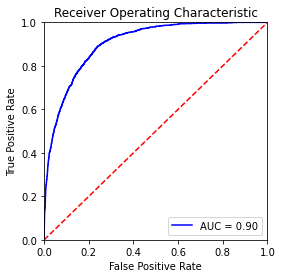

In [17]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds) # El threshold no deja de ser una probabilidad, a partir del cual se
# pasa de un lado del boundary al otro
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(4,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* Precision Recall Curve

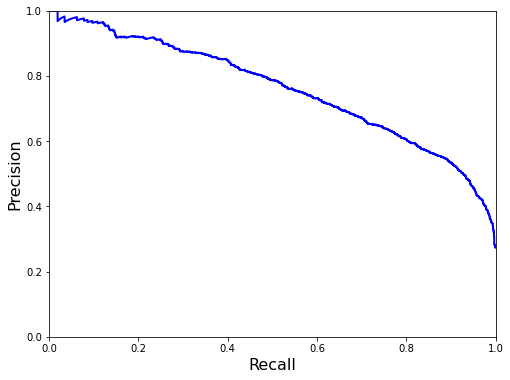

In [18]:

import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

* histogram of predicted probabilities for salaries >50K

Text(0, 0.5, 'Frequency')

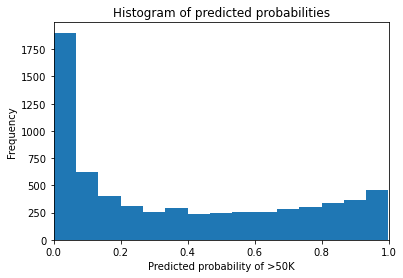

In [19]:

plt.hist(preds, bins=15)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of >50K')
plt.ylabel('Frequency')

* Distribution of the two probabilities (having >50K and having <50K), according to the model

In [20]:
def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

In [21]:
y_pred_prob_pos = y_pred_prob[np.where(y_test == 1)[0]]
y_pred_prob_neg = y_pred_prob[np.where(y_test == 0)[0]]

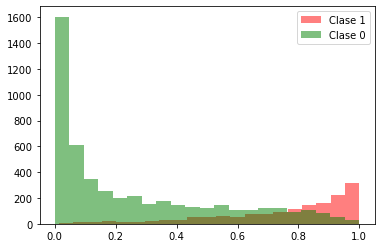

In [22]:
represento_doble_hist(y_pred_prob_pos[:, 1], y_pred_prob_neg[:, 1], n_bins=21, density=0)

## Re-calculation: If assuming more risk and want to take decision even if the propability of having >50k is more than 0.4 (instead of 0.5, already calculated)


In [23]:
threshold = 0.4 
y_umbralizadas = 1*(y_pred_prob[:, 1] >threshold)

In [24]:
# predict label>50K if the predicted probability is greater than the threshold

y_pred_class = binarize(preds.reshape(-1, 1), 0.4)



 * Classification Report

In [25]:

print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, y_umbralizadas))# CONFUSION MATRIX
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_test, y_umbralizadas),2)))  #ACCURACY SCORE
print("Recall\t{}".format(round(metrics.recall_score(y_test, y_umbralizadas),2))) # recalls
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, y_umbralizadas),2)))  # precision


Matriz de confusión
 [[3626 1292]
 [ 151 1444]]

Accuracy	0.78
Recall	0.91
Precisión	0.53


* Distribution of probability

(array([3777.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2736.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

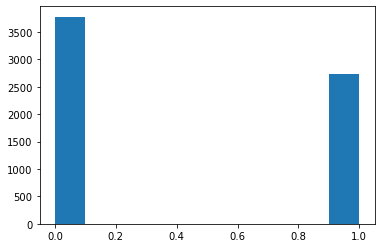

In [26]:
plt.hist(y_pred_class)